<a href="https://colab.research.google.com/github/CodeXplod/CodeXplod/blob/main/Heart_Disease_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are designing a model most suited to predict heart disease. We are provided with a dataset. We shall first perform the analysis. Then we shall design multiple models and find the best parameters. Then we will find the model with the best evaluation metrics and finalize the model.

Part 1 -  Analysis of the Dataset.

1. Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Reading the dataset in a pandas dataframe and displaying the top 5 records

In [2]:
data = pd.read_csv("/content/HeartDisease.csv")
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


As we can see, there are 15 independent features and a Target feature. We can also see that some columns are numerical and some are categorical while some are binary in nature.

In [ ]:
data.shape

(253680, 16)

We have 253680 records and 16 columns.

3. To check the information about all the columns in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age                   253680 non-null  float64
 14  Education             253680 non-null  float64
 15  

We can see that although all the columns are of float datatype, some columns are categotical and some binary in nature in addition to some being numeric

4. To check the number of null values in the columns

In [ ]:
data.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There are no null values in the dataset

5. creating a boxplot for all the columns and detecting the outliers

<Axes: >

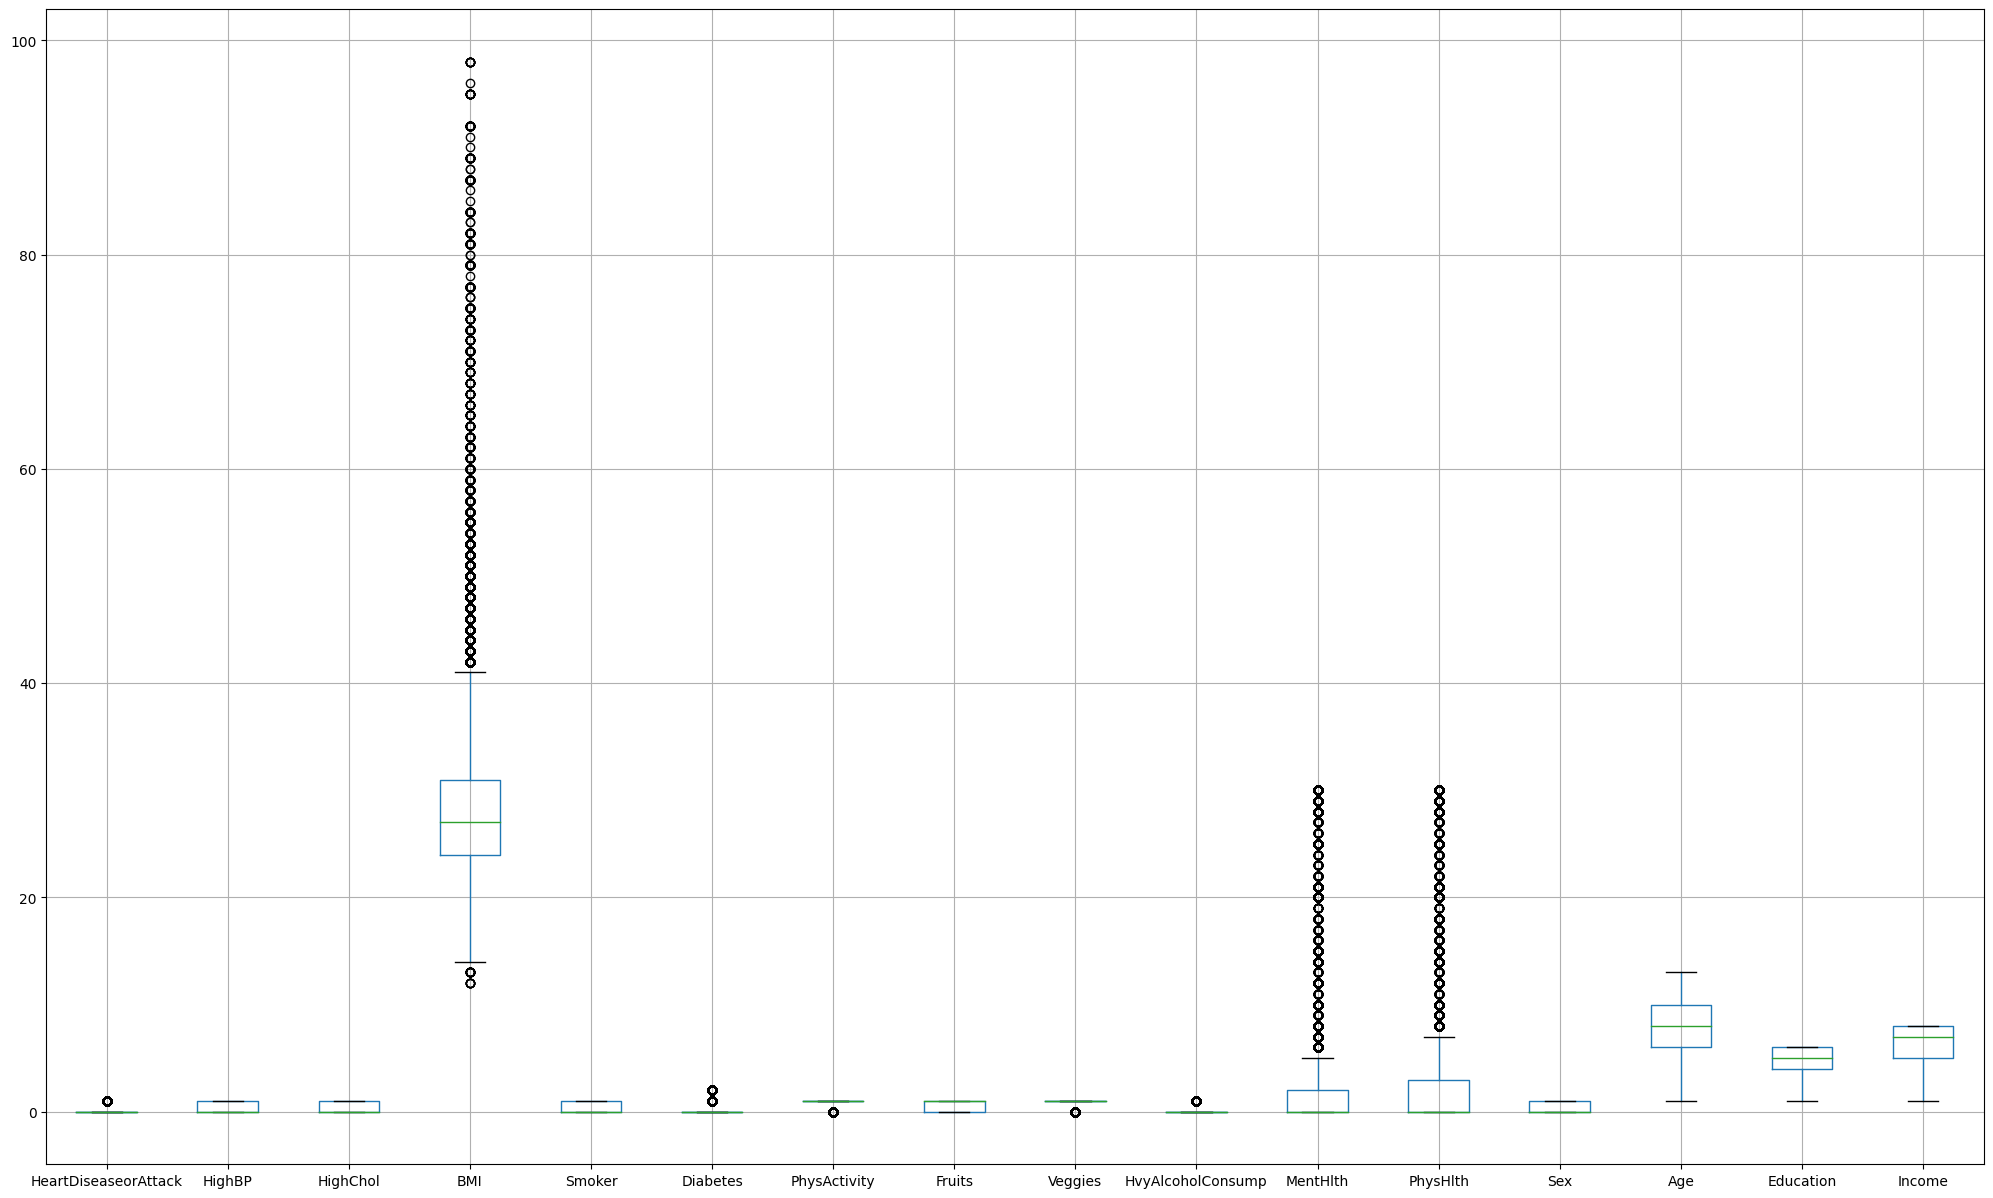

In [ ]:
data.boxplot(figsize = (25,15))

enlisting the numerical columns

In [ ]:
Numeric = ["BMI", "MentHlth", "PhysHlth"]
data[Numeric]

,BMI,MentHlth,PhysHlth
0,40.0,18.0,15.0
1,25.0,0.0,0.0
2,28.0,30.0,30.0
3,27.0,0.0,0.0
4,24.0,3.0,0.0
...,...,...,...
253675,45.0,0.0,5.0
253676,18.0,0.0,0.0
253677,28.0,0.0,0.0
253678,23.0,0.0,0.0


6. Finding the percentage of outliers in the dataset

In [ ]:
for col in Numeric:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  upper = Q3 + (1.5 * IQR)
  lower = Q1 - (1.5 * IQR)
data2 = data[~((data[col] > upper) | (data[col] < lower))]
print((len(data) - len(data2))/len(data))
#print(data[((data[col] > upper) | (data[col] < lower))].count())

0.161419899085462


However we are not going to delete the outliers as their percentage is very low approximately 16%

7. check for duplicated values

In [ ]:
data.duplicated().sum()/len(data)

0.16892147587511827

We find that the percentage of duplicate values is also approximately 16%. So we need not drop them

8. to check the statistics of the dataset

In [ ]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,28.382364,0.443169,0.296921,0.756544,0.634256,0.811420,0.056197,3.184772,4.242081,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,6.608694,0.496761,0.698160,0.429169,0.481639,0.391175,0.230302,7.412847,8.717951,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000


We find that the most of the columns are binary. Diabetes column is scaled between 0-2, BMI, Mental Health, Physical Health are continuous variables. Sex, Age, Income and Education are ordinal in nature.

Here we need to scale the numeric columns and change the datatype in binary columns to integer. we shall encode the categorical columns

9. To check the correlation of all variables among themselves and the target variable

<Axes: >

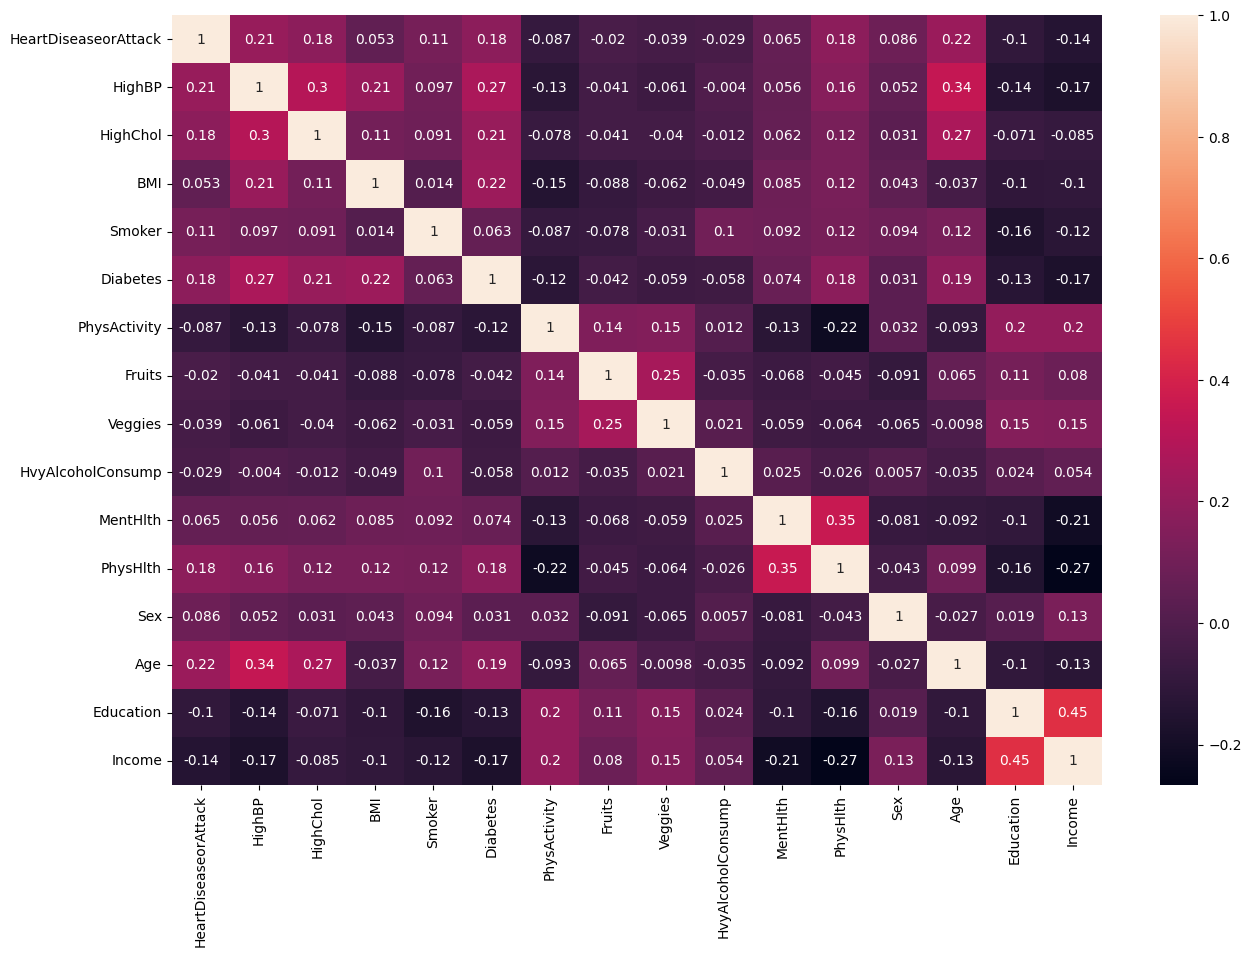

In [ ]:

plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True)

10. To check the distribution of our target variable. Also to find if our dataset is balanced or unbalanced

In [ ]:
print(data['HeartDiseaseorAttack'].value_counts())


HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64


We can see that the data is Imbalanced i.e non uniformly distributed target variable

11. Checking gender distribution according to the target variable

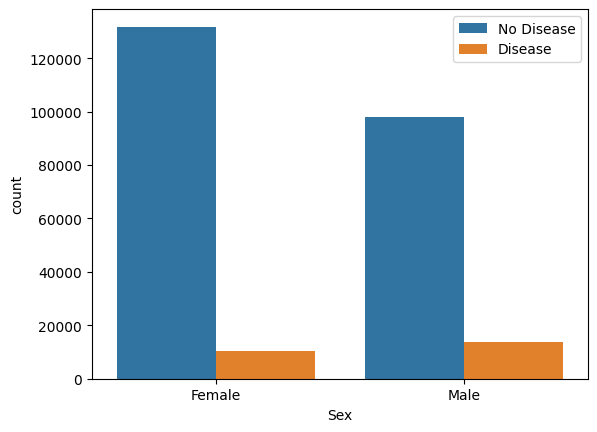

In [ ]:
sns.countplot(x = 'Sex', hue = 'HeartDiseaseorAttack', data = data)
plt.xticks([1,0], ["Male", "Female"])
plt.legend(labels = ["No Disease", "Disease"])
plt.show()

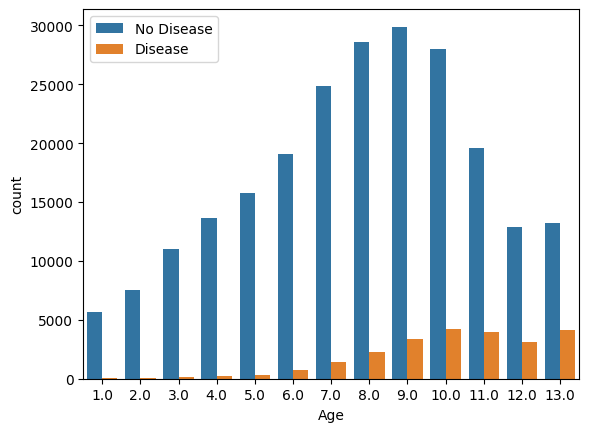

In [ ]:
sns.countplot(x = 'Age', hue = 'HeartDiseaseorAttack', data = data)
plt.legend(labels = ["No Disease", "Disease"])

plt.show()

It shows that individuals beyond the threshold of 9 have an increased risk of heart disease

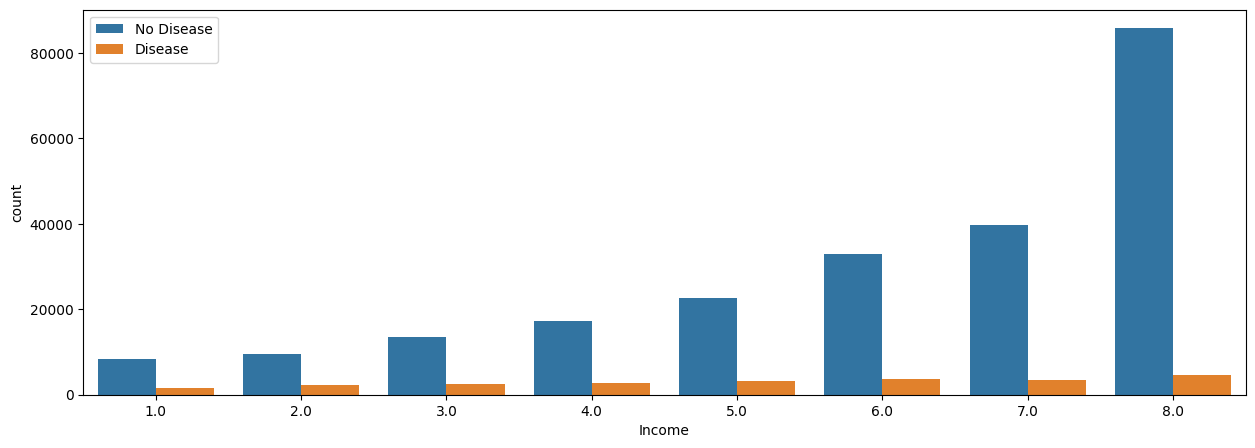

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Income', hue = 'HeartDiseaseorAttack', data = data)
plt.legend(labels = ["No Disease", "Disease"])

plt.show()

Income does not make much difference in heart diseases

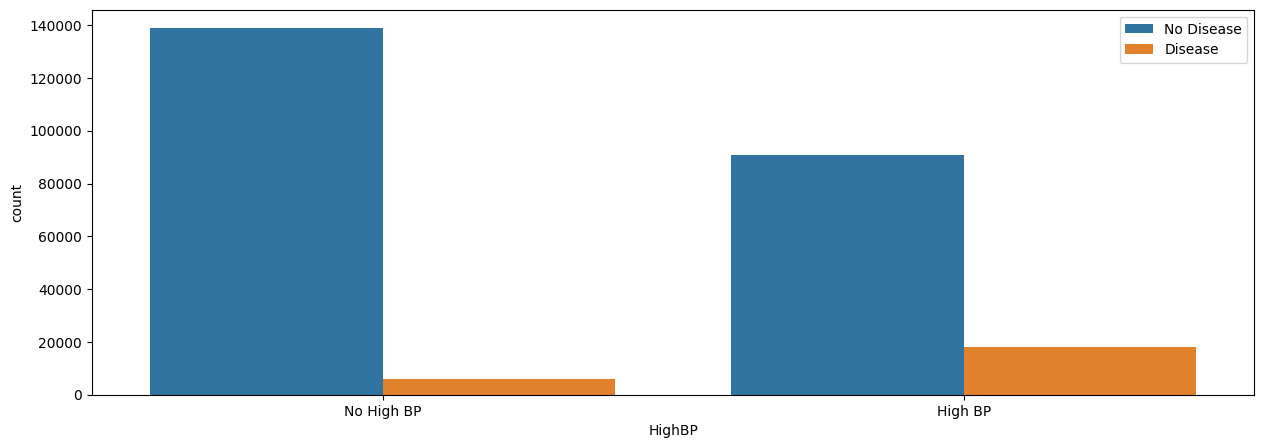

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'HighBP', hue = 'HeartDiseaseorAttack', data = data)
plt.legend(labels = ["No Disease", "Disease"])
plt.xticks([0,1], ["No High BP", "High BP"])

plt.show()

Blood Pressure significantly affects the target variable

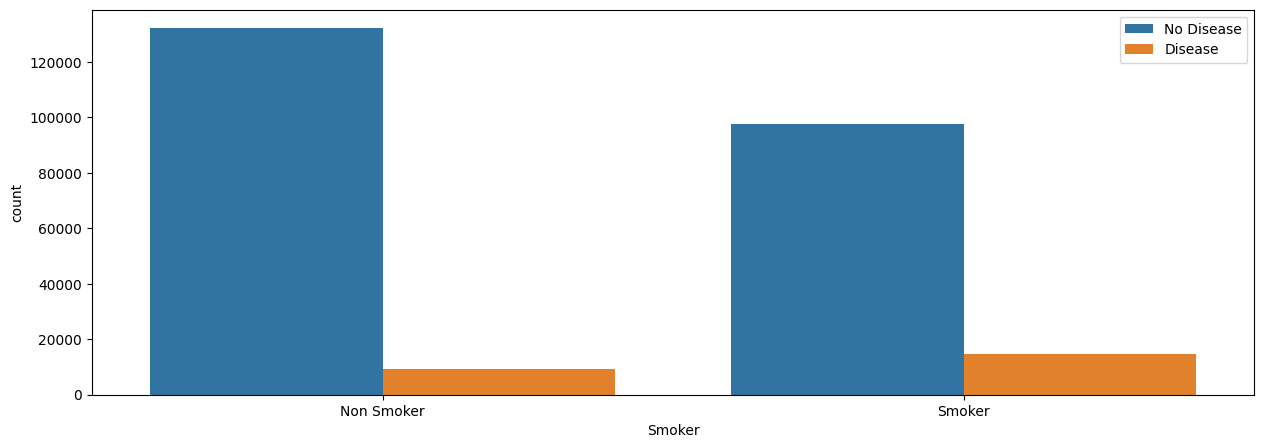

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Smoker', hue = 'HeartDiseaseorAttack', data = data)
plt.legend(labels = ["No Disease", "Disease"])
plt.xticks([1,0], ["Smoker", "Non Smoker"])

plt.show()

Smoking plays only a small role in the event of heart diseases

In [ ]:
data['Diabetes'].value_counts()

Diabetes
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

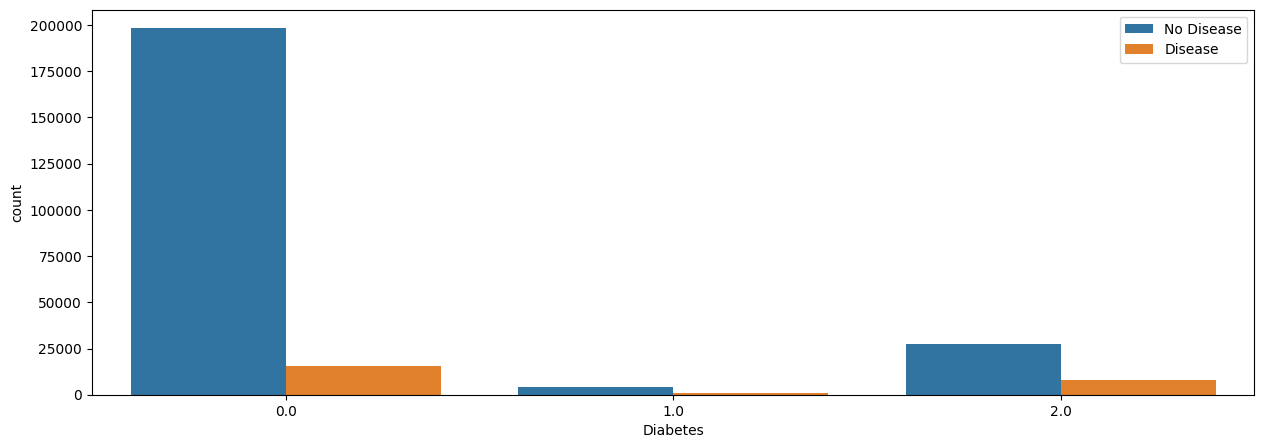

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Diabetes', hue = 'HeartDiseaseorAttack', data = data)
plt.legend(labels = ["No Disease", "Disease"])

plt.show()

Non Diabetic Patients have seen more heart diseases then Type 2 Diabetics which is more than type 1 Diabetics

12. To check the Age Distribution

<ipython-input-208-a2dfd2cf86bd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], bins=13)


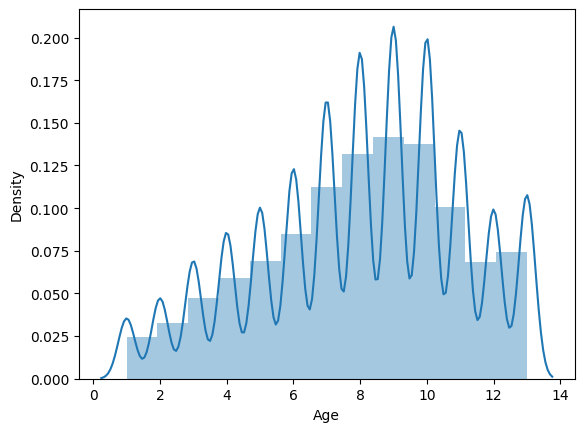

In [ ]:
sns.distplot(data['Age'], bins=13)
plt.show()

The age column represents a slightly skewed but a fairly uniform distribution

13. Check the effect of Mental health on target variable

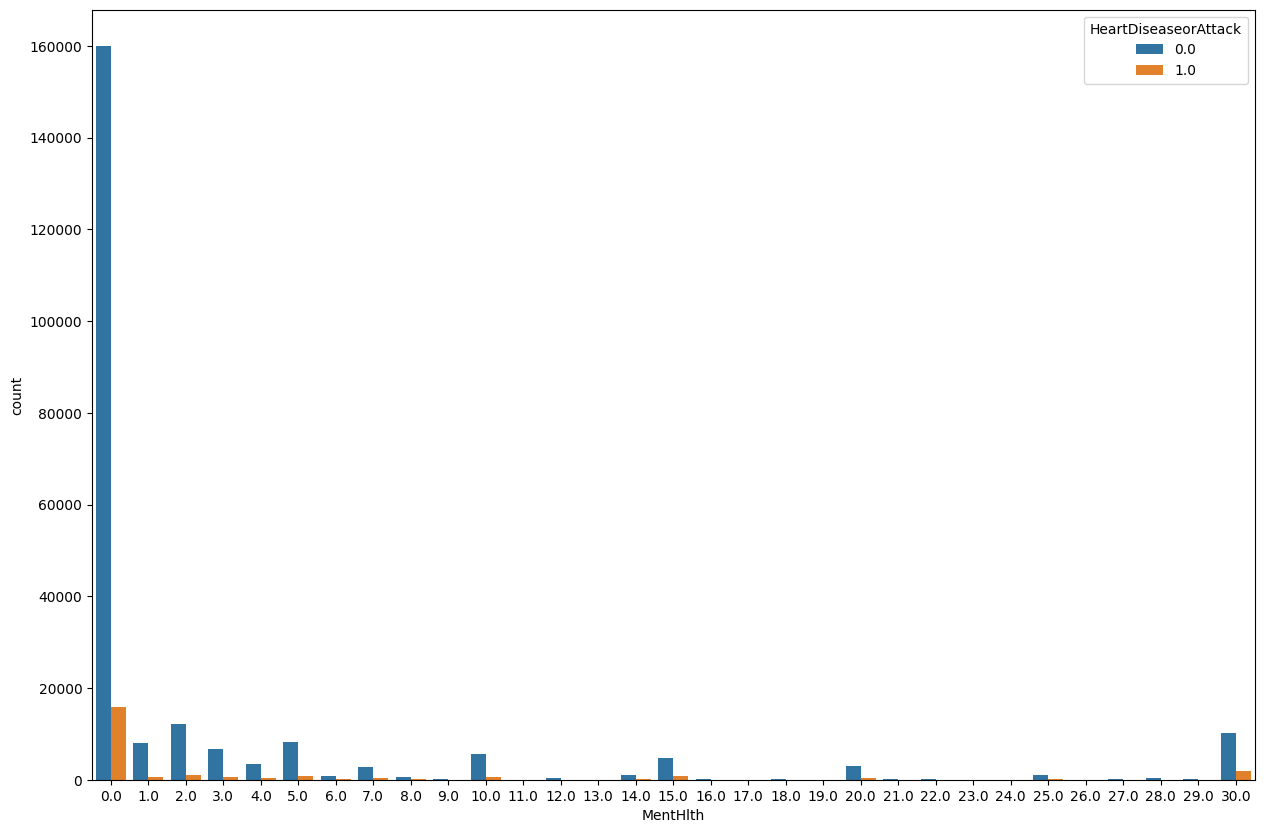

In [ ]:

plt.figure(figsize = (15,10))
sns.countplot(x = 'MentHlth', hue = 'HeartDiseaseorAttack', data = data)
plt.show()

We can say that mental health plays a vital role in heart disease. Individuals with low mental health have more cases of heart diseases

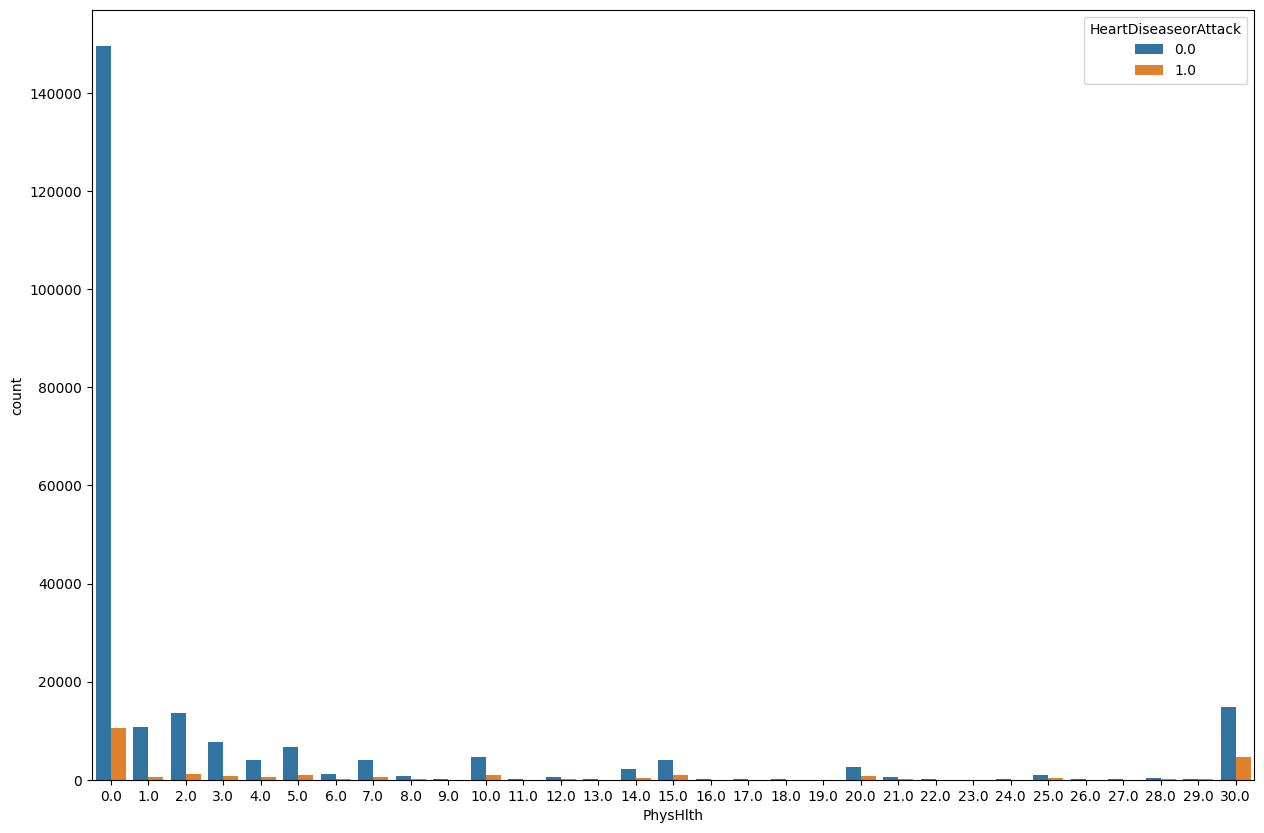

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'PhysHlth', hue = 'HeartDiseaseorAttack', data = data)
plt.show()

We can say that Physical health plays a vital role in heart disease. Individuals with low Physical health have more cases of heart diseases

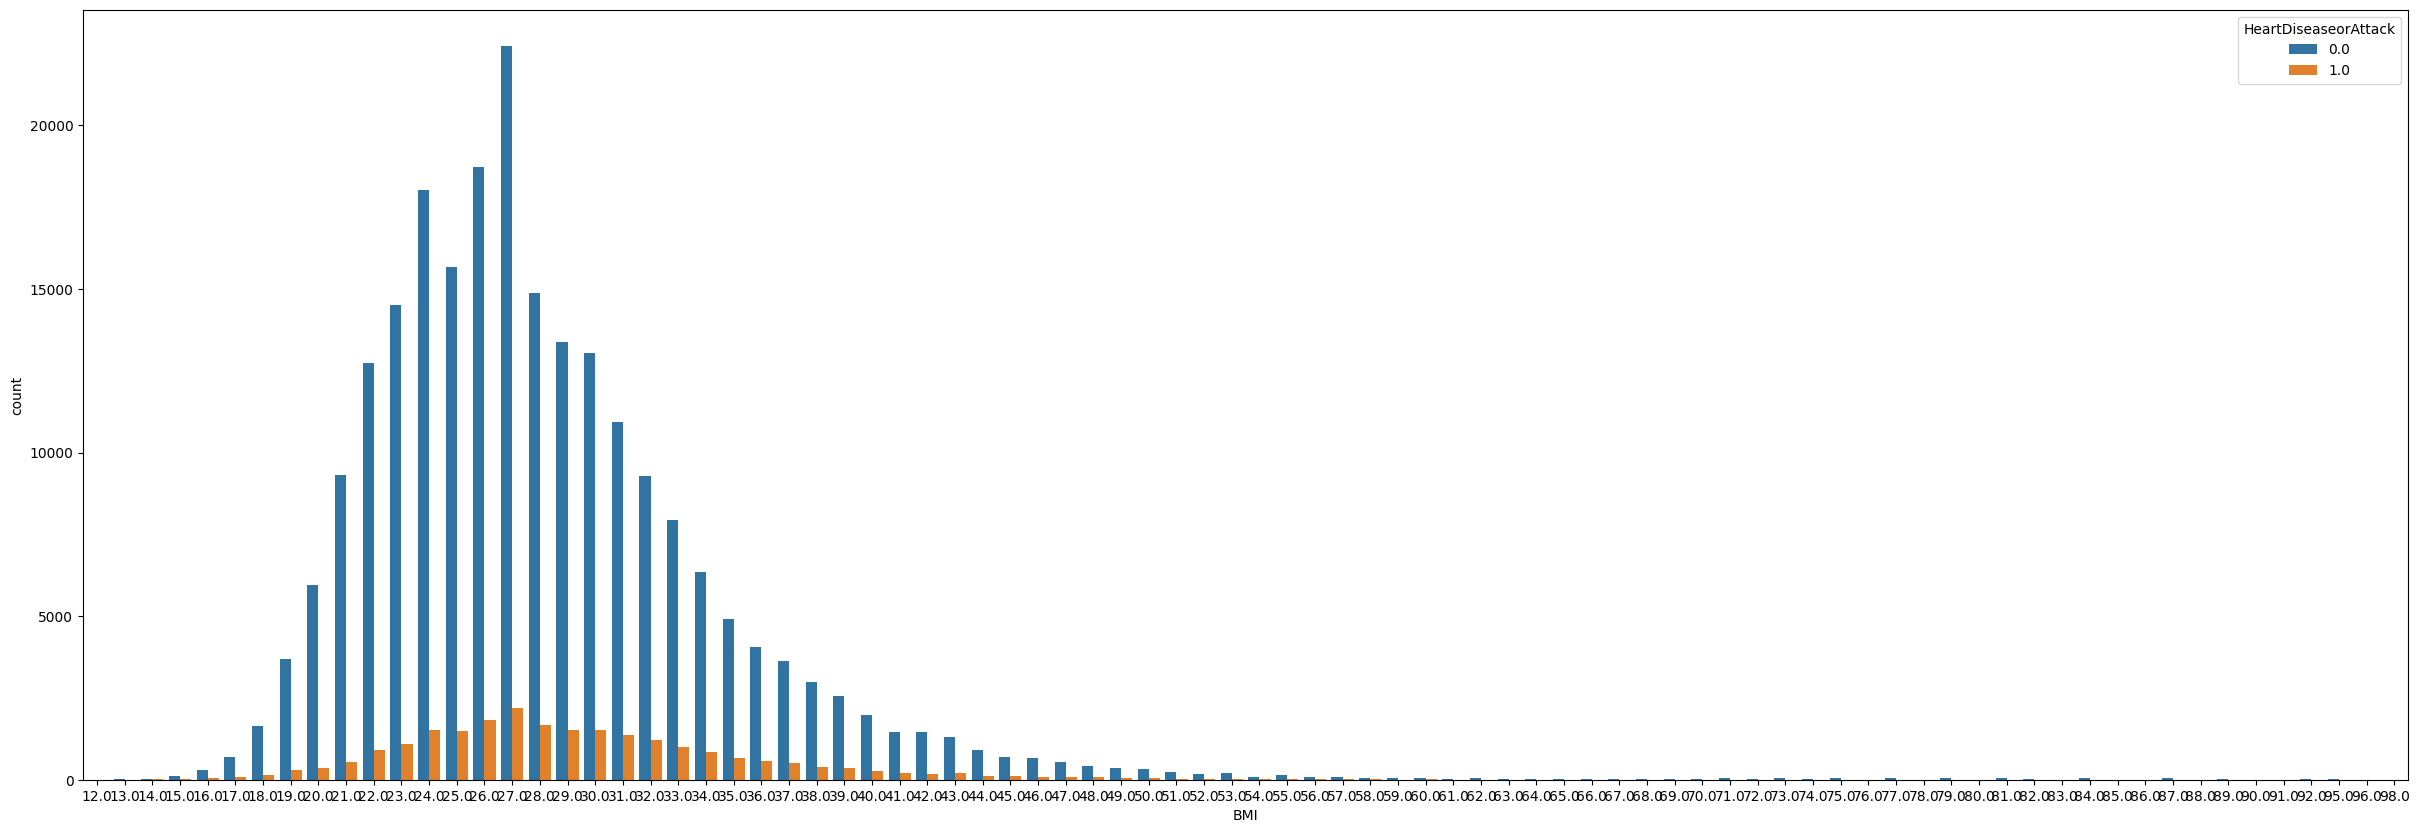

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(x = 'BMI', hue = 'HeartDiseaseorAttack', data = data)
plt.show()

It can be said that people with BMI ranging from 26 - 28 have more cases of heart diseases

14. To plot histogram for numeric values

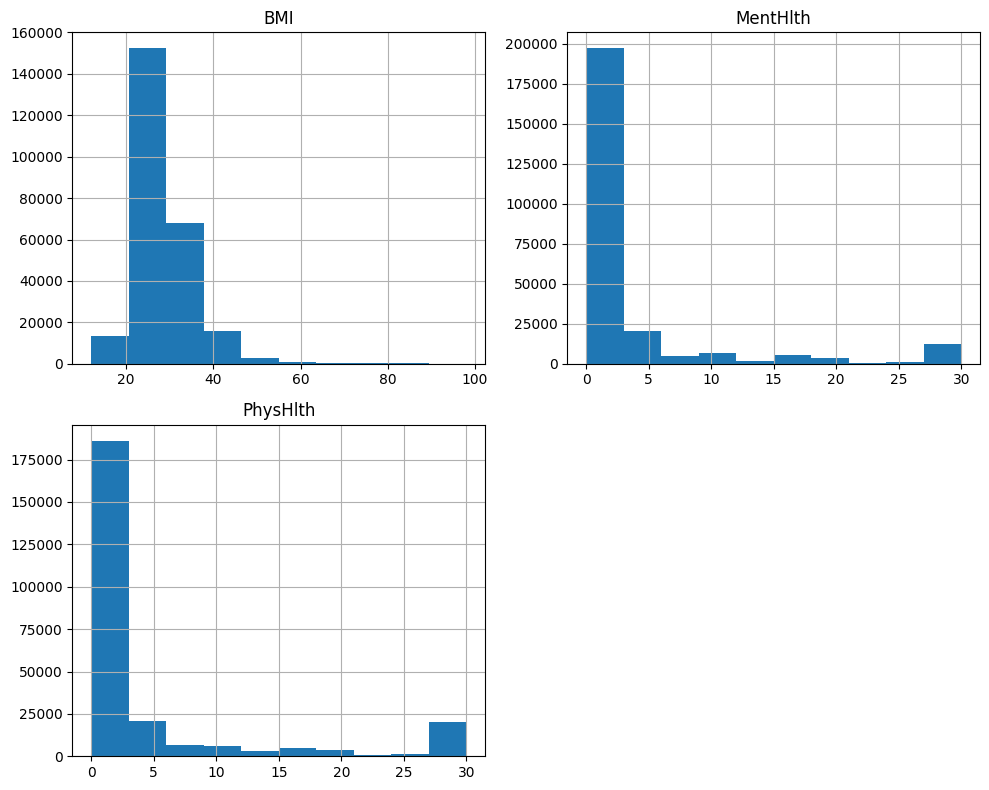

In [ ]:
data.hist(Numeric, figsize = (10,8))
plt.tight_layout()
plt.show()

More that 150000 individuals having BMI between 20 - 30
More than 190000 india=viduals having Mental Health less than 5
More than 175000 india=viduals having Physical Health less than 5


Part 2 -- Data Preprocessing

1. One hot encoding the categorical variables

In [3]:
data1 = pd.get_dummies(data, columns = ["Age", "Education", "Income"])
data1.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,Education_5.0,Education_6.0,Income_1.0,Income_2.0,Income_3.0,Income_4.0,Income_5.0,Income_6.0,Income_7.0,Income_8.0
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,...,False,True,True,False,False,False,False,False,False,False
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,True,False,False
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,...,True,False,False,False,False,True,False,False,False,False


In [ ]:
data1.shape

(253680, 40)

Now all the categorical variables are one hot encoded and can be worked with

2. Standard Scaling the numerical Values

In [4]:
from sklearn.preprocessing import StandardScaler
Standard_Scaler  = StandardScaler()
col_to_scale = ['BMI', 'MentHlth', 'PhysHlth']
data1[col_to_scale] = Standard_Scaler.fit_transform(data[col_to_scale])
data1.head()

,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,Education_5.0,Education_6.0,Income_1.0,Income_2.0,Income_3.0,Income_4.0,Income_5.0,Income_6.0,Income_7.0,Income_8.0
0,0.0,1.0,1.0,1.757936,1.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1,0.0,0.0,0.0,-0.511806,1.0,0.0,1.0,0.0,0.0,0.0,...,False,True,True,False,False,False,False,False,False,False
2,0.0,1.0,1.0,-0.057858,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,0.0,1.0,0.0,-0.209174,0.0,0.0,1.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,True,False,False
4,0.0,1.0,1.0,-0.663122,0.0,0.0,1.0,1.0,1.0,0.0,...,True,False,False,False,False,True,False,False,False,False


The numerical columns are successfully scaled.

In [ ]:
data1.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'BMI', 'Smoker',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'MentHlth', 'PhysHlth', 'Sex', 'Age_1.0', 'Age_2.0', 'Age_3.0',
       'Age_4.0', 'Age_5.0', 'Age_6.0', 'Age_7.0', 'Age_8.0', 'Age_9.0',
       'Age_10.0', 'Age_11.0', 'Age_12.0', 'Age_13.0', 'Education_1.0',
       'Education_2.0', 'Education_3.0', 'Education_4.0', 'Education_5.0',
       'Education_6.0', 'Income_1.0', 'Income_2.0', 'Income_3.0', 'Income_4.0',
       'Income_5.0', 'Income_6.0', 'Income_7.0', 'Income_8.0'],
      dtype='object')

3. To convert the binary columns to integer datatypes

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Diabetes              253680 non-null  float64
 6   PhysActivity          253680 non-null  float64
 7   Fruits                253680 non-null  float64
 8   Veggies               253680 non-null  float64
 9   HvyAlcoholConsump     253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  Sex                   253680 non-null  float64
 13  Age_1.0               253680 non-null  bool   
 14  Age_2.0               253680 non-null  bool   
 15  

We can see that all the columns are now represented as required datatypes

Taking samples for testing our models

In [6]:
sample_data = data1.sample(frac = 0.3)

4. Now we split our datset into dependent and independent variables for training

In [7]:

Y = sample_data['HeartDiseaseorAttack']
X = sample_data.drop(['HeartDiseaseorAttack'], axis = 1)
print(X.head(), Y.head())

        HighBP  HighChol       BMI  Smoker  Diabetes  PhysActivity  Fruits  \
180952     0.0       0.0  0.850039     0.0       0.0           0.0     1.0   
123118     1.0       0.0  0.396091     1.0       0.0           1.0     1.0   
176464     1.0       0.0  1.001355     0.0       0.0           0.0     0.0   
127470     1.0       0.0 -0.511806     1.0       0.0           0.0     0.0   
57954      1.0       1.0 -0.814438     1.0       0.0           0.0     0.0   

        Veggies  HvyAlcoholConsump  MentHlth  ...  Education_5.0  \
180952      1.0                0.0 -0.429630  ...          False   
123118      1.0                0.0 -0.429630  ...          False   
176464      0.0                0.0 -0.159827  ...          False   
127470      0.0                0.0  2.268395  ...          False   
57954       1.0                0.0 -0.429630  ...          False   

        Education_6.0  Income_1.0  Income_2.0  Income_3.0  Income_4.0  \
180952          False       False       False    

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [9]:
X_test.isnull().sum()

HighBP               0
HighChol             0
BMI                  0
Smoker               0
Diabetes             0
PhysActivity         0
Fruits               0
Veggies              0
HvyAlcoholConsump    0
MentHlth             0
PhysHlth             0
Sex                  0
Age_1.0              0
Age_2.0              0
Age_3.0              0
Age_4.0              0
Age_5.0              0
Age_6.0              0
Age_7.0              0
Age_8.0              0
Age_9.0              0
Age_10.0             0
Age_11.0             0
Age_12.0             0
Age_13.0             0
Education_1.0        0
Education_2.0        0
Education_3.0        0
Education_4.0        0
Education_5.0        0
Education_6.0        0
Income_1.0           0
Income_2.0           0
Income_3.0           0
Income_4.0           0
Income_5.0           0
Income_6.0           0
Income_7.0           0
Income_8.0           0
dtype: int64

5. since the dataset is imbalanced, we need to do underampling or overampling to make it a balanced data.

 We will then take samples from original data, undersampled data and oversampled data.

Oversampling

In [10]:
from imblearn.over_sampling import SMOTE


In [11]:

smote = SMOTE(random_state = 42)
smote_X_test, smote_Y_test = smote.fit_resample(X_test, Y_test)
smote_X_train, smote_Y_train = smote.fit_resample(X_train, Y_train)
print('old distribution', Y_train.value_counts())
print('new distribution', smote_Y_train.value_counts())
print('old distribution', Y_test.value_counts())
print('new distribution', smote_Y_test.value_counts())

old distribution HeartDiseaseorAttack
0.0    55185
1.0     5698
Name: count, dtype: int64
new distribution HeartDiseaseorAttack
0.0    55185
1.0    55185
Name: count, dtype: int64
old distribution HeartDiseaseorAttack
0.0    13731
1.0     1490
Name: count, dtype: int64
new distribution HeartDiseaseorAttack
0.0    13731
1.0    13731
Name: count, dtype: int64


We can see that the class distribution is now equal and the dataset is balanced

6. Similarly we shall now do undersampling to balance the dataset

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
rus_X_test, rus_Y_test = rus.fit_resample(X_test, Y_test)
rus_X_train, rus_Y_train = rus.fit_resample(X_train, Y_train)
print('old distribution', Y_train.value_counts())
print('new distribution', rus_Y_train.value_counts())

old distribution HeartDiseaseorAttack
0.0    55235
1.0     5648
Name: count, dtype: int64
new distribution HeartDiseaseorAttack
0.0    5648
1.0    5648
Name: count, dtype: int64


We now have undersampled balanced dataset


We now have X_train, Y_train from our preprocessed dataset and also X_test, Y_test

We have smote_X_train, smote_Y_train

We have rus_X_train, rus_Y_train

We will run our models on all three training sets and evaluate the best results.

Part 3 -  MODEL TRAINING AND HYPERPARAMETER TUNING

we shall train multiple ML models and tune their hyperparameters and find the best combinations for our models to deliver highest accuracy

1. KNN

In [ ]:
#from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [226]:
from sklearn.metrics import accuracy_score, confusion_matrix
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search = grid.fit(X_train, Y_train)
grid_smote = grid.fit(smote_X_train, smote_Y_train)
grid_rus = grid.fit(rus_X_train, rus_Y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits
Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [227]:
print(grid_search.best_params_)
print(grid_smote.best_params_)
print(grid_rus.best_params_)



{'n_neighbors': 29}
{'n_neighbors': 29}
{'n_neighbors': 29}


In [231]:
knn = KNeighborsClassifier(**grid_search.best_params_)
smote_knn = KNeighborsClassifier(**grid_smote.best_params_)
rus_knn = smote_knn = KNeighborsClassifier(**grid_rus.best_params_)
knn1 = knn.fit(X_train, Y_train)
knn2 = smote_knn.fit(smote_X_train, smote_Y_train)
knn3 = rus_knn.fit(rus_X_train, rus_Y_train)

Y_predict=knn.predict(X_test)
smote_Y_predict = smote_knn.predict(smote_X_test)
rus_Y_predict = rus_knn.predict(rus_X_test)
test_accuracy = accuracy_score(Y_test, Y_predict)*100
smote_test_accuracy = accuracy_score(smote_Y_test, smote_Y_predict)*100
rus_test_accuracy = accuracy_score(rus_Y_test, rus_Y_predict)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )
print("Accuracy for our smote testing dataset with tuning is : {:.2f}%".format(smote_test_accuracy) )
print("Accuracy for our rus testing dataset with tuning is : {:.2f}%".format(smote_test_accuracy) )

Accuracy for our testing dataset with tuning is : 90.80%
Accuracy for our smote testing dataset with tuning is : 75.21%
Accuracy for our rus testing dataset with tuning is : 75.21%


In [232]:
print(confusion_matrix(Y_test, Y_predict))
tn,fp,fn,tp = confusion_matrix(Y_test, Y_predict).ravel()
print(tn,fp,fn,tp)


[[13800    17]
 [ 1384    20]]
13800 17 1384 20


In [233]:
print(confusion_matrix(smote_Y_test, smote_Y_predict))
tn1,fp1,fn1,tp1 = confusion_matrix(smote_Y_test, smote_Y_predict).ravel()
print(tn1,fp1,fn1,tp1)

[[ 9450  4367]
 [ 2483 11334]]
9450 4367 2483 11334


In [234]:
print(confusion_matrix(rus_Y_test, rus_Y_predict))
tn2,fp2,fn2,tp2 = confusion_matrix(rus_Y_test, rus_Y_predict).ravel()
print(tn2,fp2,fn2,tp2)

[[ 952  452]
 [ 285 1119]]
952 452 285 1119


In [235]:
from sklearn.metrics import precision_score, recall_score
print("precision : ", precision_score(Y_test, Y_predict, average='micro'))
print("recall : ", recall_score(Y_test, Y_predict, average='micro'))

precision :  0.9079561132645687
recall :  0.9079561132645687


In [236]:
from sklearn.metrics import precision_score, recall_score
print("precision : ", precision_score(smote_Y_test, smote_Y_predict, average='micro'))
print("recall : ", recall_score(smote_Y_test, smote_Y_predict, average='micro'))

precision :  0.7521169573713541
recall :  0.7521169573713541


In [237]:
from sklearn.metrics import precision_score, recall_score
print("precision : ", precision_score(rus_Y_test, rus_Y_predict, average='micro'))
print("recall : ", recall_score(rus_Y_test, rus_Y_predict, average='micro'))

precision :  0.7375356125356125
recall :  0.7375356125356125


Thus we can see that theKNN classificationprovides us with  the best Accuracy = 74.87%, Precision = 74.87% and Recall = 74.87% scores with the optimised no of neighbors = 29 for the SMOTE oversampled data.

2. LOGISTIC REGRESSION



In [238]:
import numpy as np
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,20), "penalty":["l2"]}
logreg = LogisticRegression()
grid_logreg = GridSearchCV(logreg,grid,cv=10)
grid_logreg.fit(X_train,Y_train)

grid={"C":np.logspace(-3,3,20), "penalty":["l2"]}
logreg = LogisticRegression()
grid_logreg1 = GridSearchCV(logreg,grid,cv=10)
grid_logreg1.fit(smote_X_train,smote_Y_train)

grid={"C":np.logspace(-3,3,20), "penalty":["l2"]}
logreg = LogisticRegression()
grid_logreg2 = GridSearchCV(logreg,grid,cv=10)
grid_logreg2.fit(rus_X_train, rus_Y_train)





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l2']})

In [239]:
print("tuned hyperparameters :(best parameters) ",grid_logreg.best_params_)
print("accuracy :",grid_logreg.best_score_*100)

print("tuned hyperparameters for SMOTE:(best parameters) ",grid_logreg1.best_params_)
print("accuracy :",grid_logreg1.best_score_*100)

print("tuned hyperparameters for rus :(best parameters) ",grid_logreg2.best_params_)
print("accuracy :",grid_logreg2.best_score_*100)

tuned hyperparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 90.73468636167546
tuned hyperparameters for SMOTE:(best parameters)  {'C': 483.2930238571752, 'penalty': 'l2'}
accuracy : 83.10491536163666
tuned hyperparameters for rus :(best parameters)  {'C': 0.07847599703514611, 'penalty': 'l2'}
accuracy : 74.45098254387545


In [240]:
logreg_model = LogisticRegression(**grid_logreg.best_params_)
logreg_model.fit(X_train,Y_train)
Y_predict_logreg = logreg_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_predict_logreg)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 90.80%


In [241]:
smote_logreg_model = LogisticRegression(**grid_logreg1.best_params_)
smote_logreg_model.fit(smote_X_train, smote_Y_train)
smote_Y_predict_logreg = smote_logreg_model.predict(smote_X_test)
test_accuracy = accuracy_score(smote_Y_test, smote_Y_predict_logreg)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 86.55%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [242]:
rus_logreg_model = LogisticRegression(**grid_logreg2.best_params_)
rus_logreg_model.fit(rus_X_train, rus_Y_train)
rus_Y_predict_logreg = rus_logreg_model.predict(rus_X_test)
test_accuracy = accuracy_score(rus_Y_test, rus_Y_predict_logreg)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 75.71%


In [243]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_predict_logreg))
tn,fp,fn,tp = confusion_matrix(Y_test, Y_predict_logreg).ravel()
print("for sample", tn,fp,fn,tp)

print(confusion_matrix(smote_Y_test, smote_Y_predict_logreg))
tn1,fp1,fn1,tp1 = confusion_matrix(smote_Y_test, smote_Y_predict_logreg).ravel()
print("for smote sample", tn1,fp1,fn1,tp1)

print(confusion_matrix(rus_Y_test, rus_Y_predict_logreg))
tn2,fp2,fn2,tp2 = confusion_matrix(rus_Y_test, rus_Y_predict_logreg).ravel()
print("for rus sample", tn2,fp2,fn2,tp2)

[[13815     2]
 [ 1398     6]]
for sample 13815 2 1398 6
[[11872  1945]
 [ 1771 12046]]
for smote sample 11872 1945 1771 12046
[[1027  377]
 [ 305 1099]]
for rus sample 1027 377 305 1099


In [244]:
from sklearn.metrics import precision_score, recall_score
print("precision : ", precision_score(Y_test, Y_predict_logreg, average='micro'))
print("recall : ", recall_score(Y_test, Y_predict_logreg, average='micro'))

print("precision : ", precision_score(smote_Y_test, smote_Y_predict_logreg, average='micro'))
print("recall : ", recall_score(smote_Y_test, smote_Y_predict_logreg, average='micro'))

print("precision : ", precision_score(rus_Y_test, rus_Y_predict_logreg, average='micro'))
print("recall : ", recall_score(rus_Y_test, rus_Y_predict_logreg, average='micro'))

precision :  0.9080218119703042
recall :  0.9080218119703042
precision :  0.8655279727871462
recall :  0.8655279727871462
precision :  0.7571225071225072
recall :  0.7571225071225072


Thus the logistic regresion classification provides us with the best Accuracy =  90.66%, Precision = 90.66% and Recall = 90.66% for the sampled imbalanced dataset.

3. RANDOM FOREST CLASSIFIER

In [245]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [500],
    'max_features': ['auto','sqrt'],
    'criterion' : ["gini", 'entropy'],
    'n_jobs' : [-1]
}
rfc = RandomizedSearchCV(estimator=rf,param_distributions=param_grid, cv= 5,scoring='accuracy')
rfc.fit(X_train, Y_train)
print("tuned hyperparameters :(best parameters) ", rfc.best_params_)
print("accuracy :", rfc.best_score_*100)

rfc_smote = RandomizedSearchCV(estimator=rf,param_distributions=param_grid, cv= 5,scoring='accuracy')
rfc_smote.fit(smote_X_train, smote_Y_train)
print("tuned hyperparameters smote:(best parameters) ", rfc_smote.best_params_)
print("accuracy smote:", rfc_smote.best_score_*100)

rfc_rus = RandomizedSearchCV(estimator=rf,param_distributions=param_grid, cv= 5,scoring='accuracy')
rfc_rus.fit(rus_X_train, rus_Y_train)
print("tuned hyperparameters rus:(best parameters) ", rfc_rus.best_params_)
print("accuracy rus:", rfc_rus.best_score_*100)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.p

tuned hyperparameters :(best parameters)  {'n_jobs': -1, 'n_estimators': 500, 'max_features': 'auto', 'criterion': 'gini'}
accuracy : 90.14502902166758


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.p

tuned hyperparameters smote:(best parameters)  {'n_jobs': -1, 'n_estimators': 500, 'max_features': 'sqrt', 'criterion': 'gini'}
accuracy smote: 94.68996107540508


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.p

tuned hyperparameters rus:(best parameters)  {'n_jobs': -1, 'n_estimators': 500, 'max_features': 'auto', 'criterion': 'entropy'}
accuracy rus: 73.008195340565


Thus we find that with the following hyperparameters, the Random Forest model provides the best accuracy for the smote oversampled data

tuned hyperparameters :(best parameters)  {'n_jobs': -1, 'n_estimators': 500, 'max_features': 'auto', 'criterion': 'entropy'}
accuracy : 89%

tuned hyperparameters smote:(best parameters)  {'n_jobs': -1, 'n_estimators': 500, 'max_features': 'auto', 'criterion': 'gini'}
accuracy smote: 94%

tuned hyperparameters rus:(best parameters)  {'n_jobs': -1, 'n_estimators': 500, 'max_features': 'auto', 'criterion': 'entropy'}
accuracy rus: 73%

In [246]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
rfc = RandomForestClassifier(**rfc.best_params_)
rfc = rfc.fit(X_train, Y_train)
Y_predict_rfc = rfc.predict(X_test)
test_accuracy = accuracy_score(Y_test,Y_predict_rfc)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )
print("precision : ", precision_score(Y_test, Y_predict_rfc, average='micro'))
print("recall : ", recall_score(Y_test, Y_predict_rfc, average='micro'))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy for our testing dataset with tuning is : 89.97%
precision :  0.8997437750476316
recall :  0.8997437750476316


In [247]:
rfc_smote = RandomForestClassifier(**rfc_smote.best_params_)
rfc_smote.fit(smote_X_train, smote_Y_train)
smote_Y_predict_rfc = rfc_smote.predict(smote_X_test)
test_accuracy_smote = accuracy_score(smote_Y_test, smote_Y_predict_rfc)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy_smote) )
print("precision : ", precision_score(smote_Y_test, smote_Y_predict_rfc, average='micro'))
print("recall : ", recall_score(smote_Y_test, smote_Y_predict_rfc, average='micro'))

Accuracy for our testing dataset with tuning is : 88.93%
precision :  0.8892668451907071
recall :  0.8892668451907071


In [248]:
rfc_rus = RandomForestClassifier(** rfc_rus.best_params_)
rfc_rus.fit(rus_X_train, rus_Y_train)
rus_Y_predict_rfc = rfc_rus.predict(rus_X_test)
test_accuracy_rus = accuracy_score(rus_Y_test, rus_Y_predict_rfc)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy_rus) )
print("precision : ", precision_score(rus_Y_test, rus_Y_predict_rfc, average='micro'))
print("recall : ", recall_score(rus_Y_test, rus_Y_predict_rfc, average='micro'))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy for our testing dataset with tuning is : 73.22%
precision :  0.7321937321937322
recall :  0.7321937321937322


Hence Random forest provides us with 89% accuracy on training with imbalanced data and Accuracy for our testing dataset with tuning is : 89%
precision :  0.8963274423493858
recall :  0.8963274423493858 with the following parameters : n_jobs= -1, n_estimators= 500, max_features= 'auto', criterion= 'entropy'

the accuracy is consistent for training and testing data.




4. XGBoost

In [12]:
from xgboost import XGBClassifier


In [ ]:
estimator = XGBClassifier(
    objective='binary:logistic',
    nthread=4,
    seed=42
)

In [ ]:
parameters = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring='roc_auc',
    n_jobs=-1,
    cv=10,
    verbose=True
)

In [ ]:
randomized_search.fit(X_train, Y_train)

In [ ]:
best_model = randomized_search.best_estimator_
best_params = randomized_search.best_params_

In [ ]:
print(best_model, best_params)

In [ ]:
XGB = XGBClassifier(**best_params)


In [ ]:
XGB.fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
Y_predict_XGB = XGB.predict(X_test)
test_accuracy = accuracy_score(Y_test,Y_predict_XGB)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )
print("precision : ", precision_score(Y_test, Y_predict_XGB, average='micro'))
print("recall : ", recall_score(Y_test, Y_predict_XGB, average='micro'))


Thus for imbalance data, XGBoost gives us Accuracy for our testing dataset with tuning is : 90.23%
precision :  0.9023060245713159
recall :  0.9023060245713159 for the following parameters : {'n_estimators': 140, 'max_depth': 3, 'learning_rate': 0.1}

For SMOTE dataset

In [ ]:
randomized_search.fit(smote_X_train, smote_Y_train)
smote_best_params = randomized_search.best_params_
print(smote_best_params)

In [18]:
XGB_smote = XGBClassifier(**smote_best_params)

In [20]:
XGB_smote.fit(smote_X_train, smote_Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
smote_Y_predict_XGB = XGB_smote.predict(smote_X_test)
test_accuracy_smote = accuracy_score(smote_Y_test,smote_Y_predict_XGB)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy_smote) )
print("precision : ", precision_score(smote_Y_test, smote_Y_predict_XGB, average='micro'))
print("recall : ", recall_score(smote_Y_test, smote_Y_predict_XGB, average='micro'))


Accuracy for our testing dataset with tuning is : 90.69%
precision :  0.9069259340179157
recall :  0.9069259340179157


Thus for smote oversampled data, XGBoost gives us Accuracy for our testing dataset with tuning is : 94.22%
precision :  0.9421748927818565
recall :  0.9421748927818565 for the following parameters : {'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.1}

In [ ]:
randomized_search.fit(rus_X_train, rus_Y_train)
rus_best_params = randomized_search.best_params_
print(rus_best_params)

In [ ]:
XGB_rus = XGBClassifier(**rus_best_params)

In [ ]:
XGB_rus.fit(rus_X_train, rus_Y_train)

In [ ]:
rus_Y_predict_XGB = XGB_rus.predict(rus_X_test)
test_accuracy_rus = accuracy_score(rus_Y_test,rus_Y_predict_XGB)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy_rus) )
print("precision : ", precision_score(rus_Y_test, rus_Y_predict_XGB, average='micro'))
print("recall : ", recall_score(rus_Y_test, rus_Y_predict_XGB, average='micro'))


Thus for undersampled data, XGBoost gives us Accuracy for our testing dataset with tuning is : 74.32%
precision :  0.7431693989071039
recall :  0.7431693989071039 for the following parameters : {'n_estimators': 140, 'max_depth': 4, 'learning_rate': 0.1}

Thus the best prediction with XGboost is delivered for smote oversampled data with Accuracy for our testing dataset with tuning is : 94.22%
precision :  0.9421748927818565
recall :  0.9421748927818565 for the following parameters : {'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.1}

5. SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
svc = SVC()
param_distributions= {'C': [10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

randomized_search = RandomizedSearchCV(svc, param_distributions, refit = True, verbose =0,cv=5)


randomized_search.fit(X_train, Y_train)

print("tuned hyperparameters :(best parameters) ",randomized_search.best_params_)

print("accuracy :",randomized_search.best_score_*100)


In [ ]:
svc = SVC(**randomized_search.best_params_)

In [ ]:
svc.fit(X_train,Y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
Y_predict_svc = svc.predict(X_test)
test_accuracy_svc = accuracy_score(Y_test, Y_predict_svc)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy_svc) )
print("precision : ", precision_score(Y_test, Y_predict_svc, average='micro'))
print("recall : ", recall_score(Y_test, Y_predict_svc, average='micro'))


In [ ]:

svc = SVC()
param_distributions= {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

randomized_search = RandomizedSearchCV(svc, param_distributions, refit = True, verbose =0,cv=5)


randomized_search.fit(smote_X_train, smote_Y_train)

print("tuned hyperparameters :(best parameters) ",randomized_search.best_params_)

print("accuracy :",randomized_search.best_score_*100)


In [ ]:
best_params = randomized_search.best_params_
print(best_params)

In [ ]:
svc_smote = SVC(**best_params)


In [ ]:
svc_smote

In [ ]:
svc_smote.fit(smote_X_train, smote_Y_train)

In [ ]:
smote_Y_predict_svc = svc_smote.predict(smote_X_test)
test_accuracy_svc_smote = accuracy_score(smote_Y_test, smote_Y_predict_svc)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy_svc_smote) )
print("precision : ", precision_score(smote_Y_test, smote_Y_predict_svc, average='micro'))
print("recall : ", recall_score(smote_Y_test, smote_Y_predict_svc, average='micro'))


In [ ]:
svc = SVC()
param_distributions= {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

randomized_search = RandomizedSearchCV(svc, param_distributions, refit = True, verbose =0,cv=5)


randomized_search.fit(rus_X_train, rus_Y_train)

print("tuned hyperparameters :(best parameters) ",randomized_search.best_params_)

print("accuracy :",randomized_search.best_score_*100)

In [ ]:
best_params = randomized_search.best_params_
print(best_params)

In [ ]:
svc_rus = SVC(**best_params)

In [ ]:
svc_rus

In [ ]:
svc_rus.fit(rus_X_train, rus_Y_train)

In [ ]:
rus_Y_predict_svc = svc_rus.predict(rus_X_test)
test_accuracy_svc_rus = accuracy_score(rus_Y_test, rus_Y_predict_svc)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy_svc_rus) )
print("precision : ", precision_score(rus_Y_test, rus_Y_predict_svc, average='micro'))
print("recall : ", recall_score(rus_Y_test, rus_Y_predict_svc, average='micro'))


Hence the SVM Classifier predicts the imbalanced data with
Accuracy for our testing dataset with tuning is : 90.77%
precision :  0.9076682316118936
recall :  0.9076682316118936

for the following parameters : { kernel= 'rbf', gamma= 0.001, C= 1000 }



Thus the best prediction with XGboost is delivered for smote oversampled data with Accuracy for our testing dataset with tuning is : 94.22% precision : 0.9421748927818565 recall : 0.9421748927818565 for the following parameters : {'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.1}



PART 4. We shall now be using these hyperparameters with Random Forest Classifier on the smote data through a pipeline with preprocessing to be done within the pipe and then calculate the metrics

Now we need to apply this XGBoost model to our entire smote oversampled dataset with the above parameters through a pipeline and predict for the testing data and evaluate

In [24]:
data = pd.read_csv("/content/HeartDisease.csv")
data.head()


,HeartDiseaseorAttack,HighBP,HighChol,BMI,Smoker,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,15.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,30.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,27.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,24.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,11.0,5.0,4.0


In [25]:
data.shape


(253680, 16)

Splitting the dataset into dependent and independent variables

In [26]:

Y = data['HeartDiseaseorAttack']
X = data.drop(['HeartDiseaseorAttack'], axis = 1)
print(X.head(), Y.head())

   HighBP  HighChol   BMI  Smoker  Diabetes  PhysActivity  Fruits  Veggies  \
0     1.0       1.0  40.0     1.0       0.0           0.0     0.0      1.0   
1     0.0       0.0  25.0     1.0       0.0           1.0     0.0      0.0   
2     1.0       1.0  28.0     0.0       0.0           0.0     1.0      0.0   
3     1.0       0.0  27.0     0.0       0.0           1.0     1.0      1.0   
4     1.0       1.0  24.0     0.0       0.0           1.0     1.0      1.0   

   HvyAlcoholConsump  MentHlth  PhysHlth  Sex   Age  Education  Income  
0                0.0      18.0      15.0  0.0   9.0        4.0     3.0  
1                0.0       0.0       0.0  0.0   7.0        6.0     1.0  
2                0.0      30.0      30.0  0.0   9.0        4.0     8.0  
3                0.0       0.0       0.0  0.0  11.0        3.0     6.0  
4                0.0       3.0       0.0  0.0  11.0        5.0     4.0   0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: HeartDiseaseorAttack, dtype: float64


Train Test Split on the original dataset

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

Creating SMOTE oversampled dataset to counter the imbalanced target variable distribution

In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
smote_X_test, smote_Y_test = smote.fit_resample(X_test, Y_test)
smote_X_train, smote_Y_train = smote.fit_resample(X_train, Y_train)
print('old distribution', Y_train.value_counts())
print('new distribution', smote_Y_train.value_counts())
print('old distribution', Y_test.value_counts())
print('new distribution', smote_Y_test.value_counts())

old distribution HeartDiseaseorAttack
0.0    183819
1.0     19125
Name: count, dtype: int64
new distribution HeartDiseaseorAttack
0.0    183819
1.0    183819
Name: count, dtype: int64
old distribution HeartDiseaseorAttack
0.0    45968
1.0     4768
Name: count, dtype: int64
new distribution HeartDiseaseorAttack
0.0    45968
1.0    45968
Name: count, dtype: int64


 create pipeline

In [29]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier

In [30]:
numeric = Pipeline(
    steps = [("scaler", StandardScaler())]
)

In [31]:
categorical = Pipeline(
    steps = [("categorical", OneHotEncoder(handle_unknown= 'ignore'))],
    #remainder = 'passthrough'
)

In [32]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    [("Categorical", categorical, ["Age",	"Education", "Income"]),
     ("Numerical", numeric, ["BMI",	"MentHlth",	"PhysHlth"])]
)

In [33]:
preprocessor

ColumnTransformer(transformers=[('Categorical',
                                 Pipeline(steps=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Age', 'Education', 'Income']),
                                ('Numerical',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['BMI', 'MentHlth', 'PhysHlth'])])

In [34]:
from sklearn.pipeline import make_pipeline

Defining the pipeline with tuned parameters for the SMOTE dataset

In [35]:
pipe = make_pipeline(preprocessor, XGBClassifier(**smote_best_params))

In [ ]:
'''**smote_best_params
n_estimators = 100, max_depth = 8, learning_rate = 0.1

In [36]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age', 'Education',
                                                   'Income']),
                                                 ('Numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=140, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [37]:
pipe.fit(smote_X_train, smote_Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age', 'Education',
                                                   'Income']),
                                                 ('Numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=140, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

Predict for testing data

In [38]:
smote_Y_predict_pipe = pipe.predict(smote_X_test)
smote_Y_predict_pipe

array([0, 1, 0, ..., 1, 1, 0])

Predict for training data

In [39]:
smote_Y_predict_train_pipe = pipe.predict(smote_X_train)
smote_Y_predict_train_pipe

array([0, 0, 1, ..., 1, 1, 1])

Metrics for the Testing Data

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve
print("Accuracy for our testing smote oversampled dataset with tuning is : {:.2f}%".format(accuracy_score(smote_Y_test, smote_Y_predict_pipe)) )
print("precision : ", precision_score(smote_Y_test, smote_Y_predict_pipe, average='micro'))
print("recall : ", recall_score(smote_Y_test, smote_Y_predict_pipe, average='micro'))


Accuracy for our testing smote oversampled dataset with tuning is : 0.86%
precision :  0.8632200661329621
recall :  0.8632200661329621


Metrics for the Training Data

In [41]:
print("Accuracy for our training smote oversampled dataset with tuning is : {:.2f}%".format(accuracy_score(smote_Y_train, smote_Y_predict_train_pipe)) )
print("precision : ", precision_score(smote_Y_train, smote_Y_predict_train_pipe, average='micro'))
print("recall : ", recall_score(smote_Y_train, smote_Y_predict_train_pipe, average='micro'))


Accuracy for our training smote oversampled dataset with tuning is : 0.84%
precision :  0.8434628629249424
recall :  0.8434628629249424


Thus it can be found out that for this analysis and prediction, XGBoost with tuned hyperparameters works best with smote oversampled data created from the original dataset.
This model has low bias and low variance and is performing at 90% Accuracy, Precision and Recall

Plotting the Precision - Recall curve

In [42]:
precision, recall, thresholds = precision_recall_curve(smote_Y_test, smote_Y_predict_pipe)

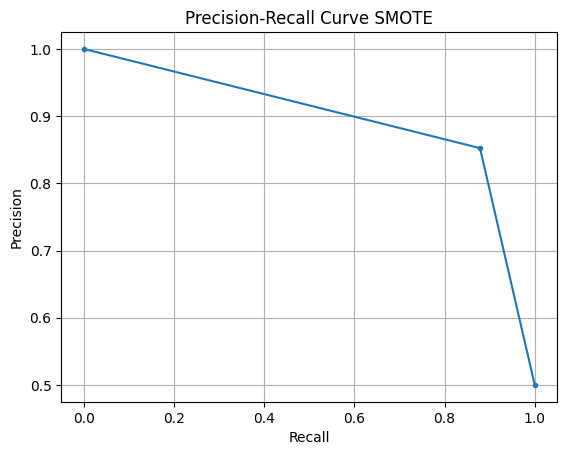

In [58]:
import matplotlib.pyplot as plt

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve SMOTE')
plt.grid(True)
plt.show()

In [44]:
print(precision)
print(recall)
print(thresholds)

[0.5        0.85238809 1.        ]
[1.         0.87858945 0.        ]
[0 1]


Checking the pipe efficiency for the original dataset (New Unknown dataset on which the training has not been done)

In [45]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Categorical',
                                                  Pipeline(steps=[('categorical',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age', 'Education',
                                                   'Income']),
                                                 ('Numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=140, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [46]:
Y_predict_train_pipe = pipe.predict(X_train)
Y_predict_train_pipe


array([0, 0, 0, ..., 0, 0, 0])

In [47]:
print("Accuracy for our training smote oversampled dataset with tuning is : {:.2f}%".format(accuracy_score(Y_train, Y_predict_train_pipe)) )
print("precision : ", precision_score(Y_train, Y_predict_train_pipe, average='micro'))
print("recall : ", recall_score(Y_train, Y_predict_train_pipe, average='micro'))


Accuracy for our training smote oversampled dataset with tuning is : 0.91%
precision :  0.9057720356354463
recall :  0.9057720356354463


In [48]:
Y_predict_pipe = pipe.predict(X_test)
Y_predict_pipe

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve
print("Accuracy for our testing original dataset with tuning is : {:.2f}%".format(accuracy_score(Y_test, Y_predict_pipe)) )
print("precision : ", precision_score(Y_test, Y_predict_pipe, average='micro'))
print("recall : ", recall_score(Y_test, Y_predict_pipe, average='micro'))


Accuracy for our testing original dataset with tuning is : 0.91%
precision :  0.9060233364869127
recall :  0.9060233364869127


In [54]:
precision_original, recall_original, thresholds_original = precision_recall_curve(Y_test, Y_predict_pipe)

In [59]:
print(precision_original)
print(recall_original)
print(thresholds_original)

[0.09397666 1.        ]
[1. 0.]
[0]


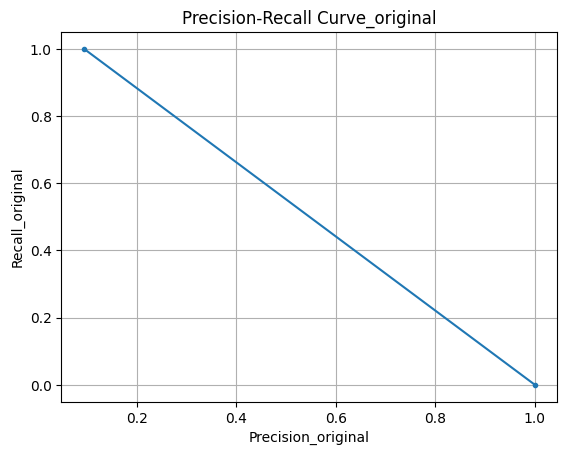

In [60]:
import matplotlib.pyplot as plt

plt.plot(precision_original, recall_original,  marker='.')
plt.xlabel('Precision_original')
plt.ylabel('Recall_original')
plt.title('Precision-Recall Curve_original')
plt.grid(True)
plt.show()

For checking the most determining factors

<Axes: >

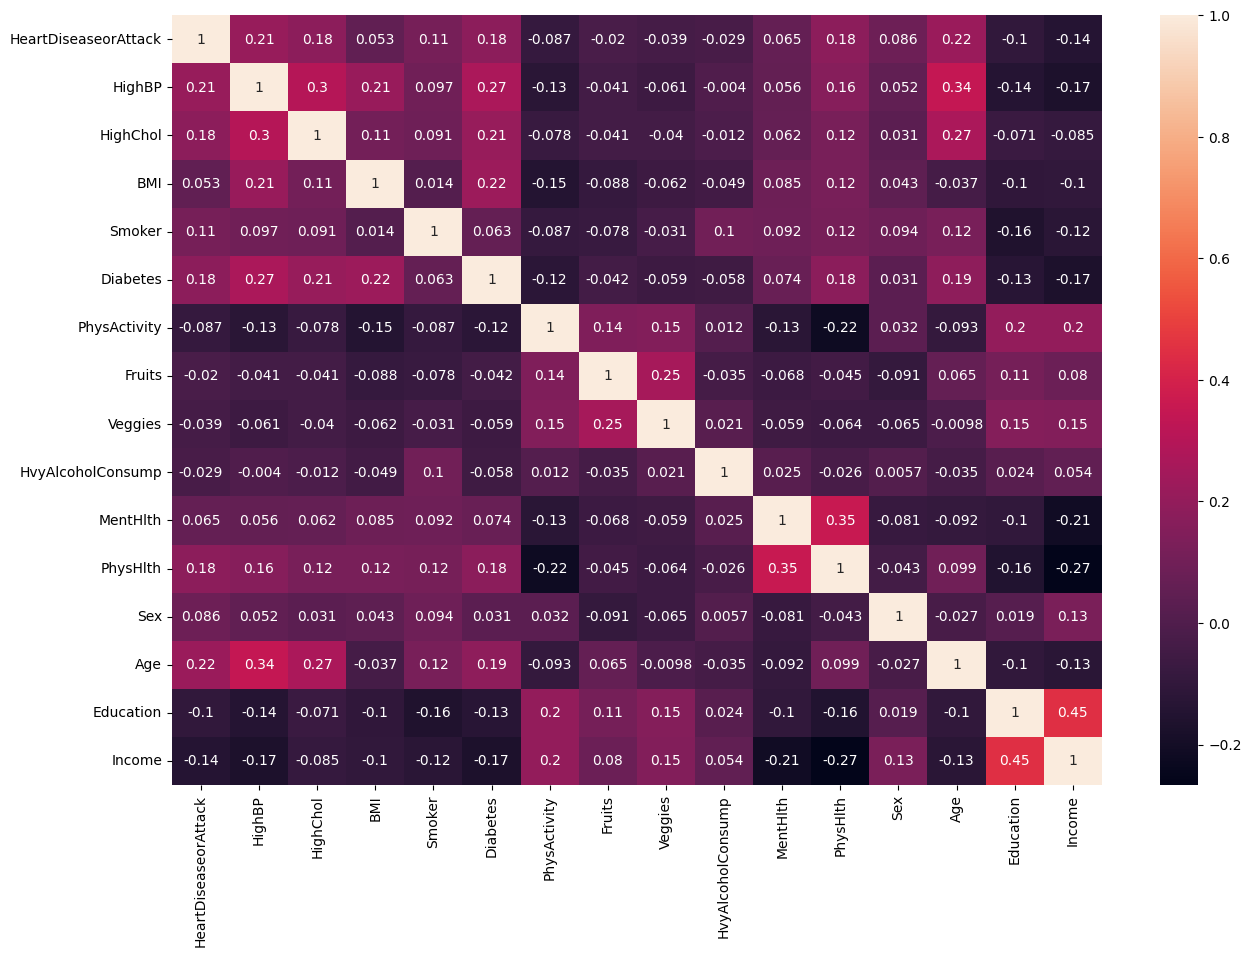

In [57]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True)


Hence it can be affirmed from the heatmap that fatures such as High BP, High Cholestrol, Smoker, Diabetes, Physical Health, Age, Education and income affect the target outcome of having or being prone to heart disease. However the most important factors driving the outcome are High BP, High Cholestrol and Diabetes.